## LINEAR REGRESSION

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a column matrix X values

X = torch.linspace(1,50,50).reshape(-1,1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [6]:
# Create the column matrix for y values
y = 2*X + 1 + e
print(y)

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])


Text(0, 0.5, 'y')

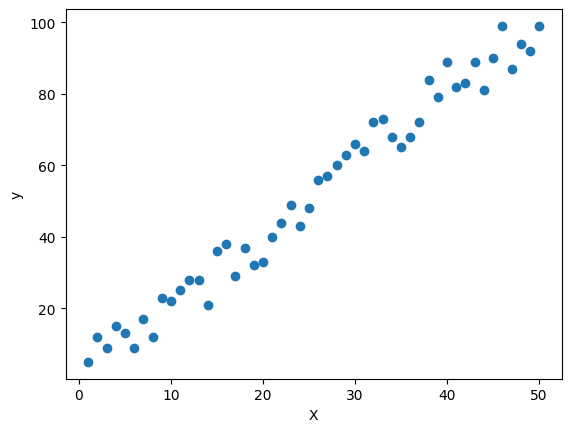

In [7]:
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

In [8]:
# Simple Linear Regression Model

torch.manual_seed(71)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.0145]], requires_grad=True)
Parameter containing:
tensor([-0.3306], requires_grad=True)


In [9]:
# Define the simple linear regression class

class Model(nn.Module):
    def __init__(self, in_features = 1, out_features = 1):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x) 
        return y_pred

In [14]:
torch.manual_seed(59)
x = torch.tensor([2.0])
model = Model(1,1)

y_pred = model.forward(x)
print(y_pred)
print(model.linear.weight)
print(model.linear.bias)
print("\n")
print("Weight: ",model.linear.weight.item())
print("Bias: ", model.linear.bias.item()) 

tensor([1.1758], grad_fn=<ViewBackward0>)
Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Weight:  0.10597813129425049
Bias:  0.9637961387634277


In [15]:
# get those params from the model

for name, param in model.named_parameters():
    print(name, '\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [16]:
# PLOT our first model which hasn't been trained on our dataset

x1 = np.array([X.min(), X.max()])
print(x1)

[ 1. 50.]


In [17]:
# Using the model for this x1

weight, bias = model.linear.weight.item(), model.linear.bias.item()
y1 = weight*x1 + bias
print(y1)

[1.0697743 6.2627025]


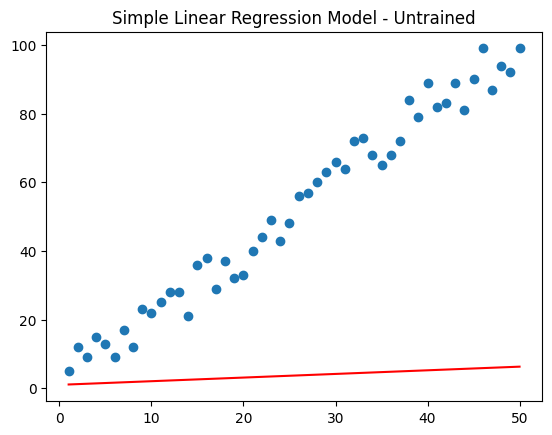

In [20]:
# Plot it out
plt.title("Simple Linear Regression Model - Untrained")
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')

In [ ]:
# Okay, we set the loss function to see how far off we are from our predictions
# Really important for training because we have to reset all of them first.
# Then we do backpropagation and then we do an optimizer step to update the weights and biases
import torch.optim as optim

torch.manual_seed(42) # This one
model = Model(1,1) # This one

LEARNING_RATE = 1e-3
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE) # This one

EPOCHS = 20

losses = []

for epoch in range(EPOCHS):
    model.train()
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1} \t Loss: {loss.item():.4f}")

Epoch: 1 	 Loss: 1311.5671
Epoch: 2 	 Loss: 687.3706
Epoch: 3 	 Loss: 365.1199
Epoch: 4 	 Loss: 198.7533
Epoch: 5 	 Loss: 112.8637
Epoch: 6 	 Loss: 68.5218
Epoch: 7 	 Loss: 45.6293
Epoch: 8 	 Loss: 33.8104
Epoch: 9 	 Loss: 27.7084
Epoch: 10 	 Loss: 24.5579
Epoch: 11 	 Loss: 22.9310
Epoch: 12 	 Loss: 22.0908
Epoch: 13 	 Loss: 21.6568
Epoch: 14 	 Loss: 21.4324
Epoch: 15 	 Loss: 21.3162
Epoch: 16 	 Loss: 21.2559
Epoch: 17 	 Loss: 21.2245
Epoch: 18 	 Loss: 21.2080
Epoch: 19 	 Loss: 21.1991
Epoch: 20 	 Loss: 21.1943


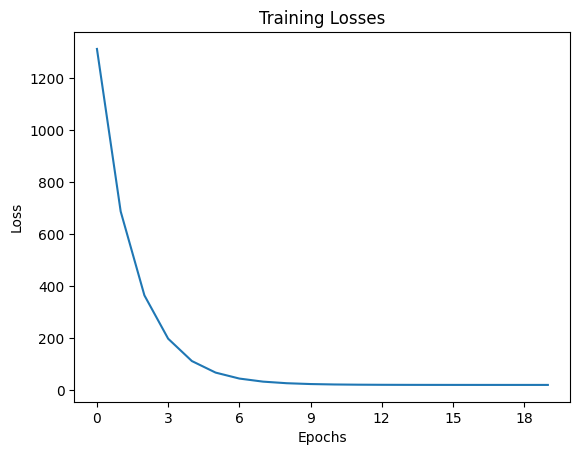

In [29]:
plt.title("Training Losses")
plt.plot(range(EPOCHS), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

import matplotlib.ticker as ticker

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

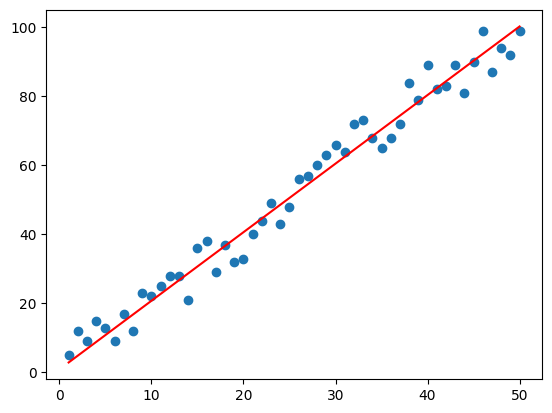

In [30]:
# Plot the prediction results

model.eval()
with torch.no_grad():
    predicted = model.forward(X)
    plt.scatter(X.numpy(), y.numpy(), label='Original data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted line')
    plt.show()